In [6]:
!python3 -m pip install pandas numpy matplotlib plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.1 MB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 39.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 35.8 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 107 kB 36.1 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os
import re

Matplotlib is building the font cache; this may take a moment.


In [9]:
df = pd.read_csv(
    'data/real_scenario.csv'
)
df

,ts,mghi,ghi,mdhi,dhi,mdni,dni,mg,mangle,zenith,azimuth
0,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-118.505064,-134.816095
1,2022-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-120.903448,-137.671865
2,2022-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-123.169311,-140.741535
3,2022-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-125.286073,-144.037263
4,2022-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-127.235676,-147.568064
...,...,...,...,...,...,...,...,...,...,...,...
35035,2022-12-31 22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-105.007814,-123.273605
35036,2022-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-107.872910,-125.276792
35037,2022-12-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-110.665531,-127.422233
35038,2022-12-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-113.376411,-129.723619


In [56]:
a.shape[0]/600

29.381666666666668

Text(0, 0.5, 'count')

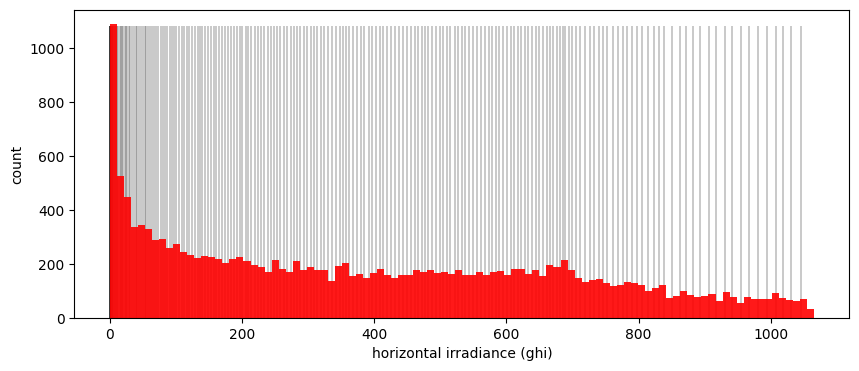

In [69]:
a = df.query('mg > 0')
l=4
plt.subplots(figsize=[l*2.5, l])


b = 200
plt.vlines(
    [a.ghi.quantile(n/b) for n in range(b)],
    ymin=0, ymax=1083, colors='black', zorder=0,linewidth=0.3
)
plt.hist(a.ghi, bins=100, alpha=0.9, color='red')
plt.xlabel("horizontal irradiance (ghi)")
plt.ylabel("count")

Text(0, 0.5, 'count')

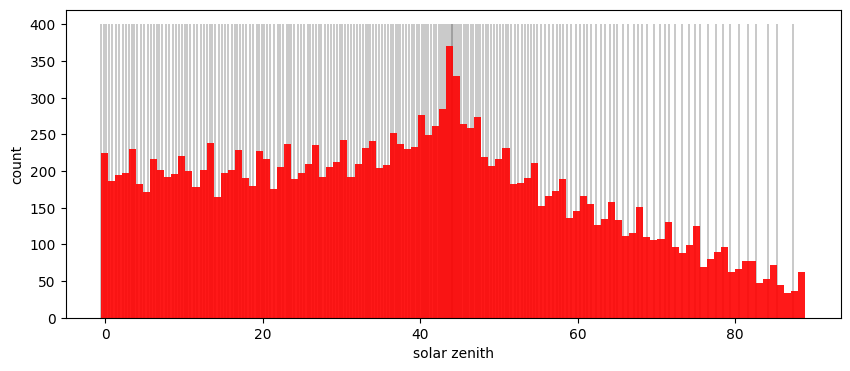

In [70]:
a = df.query('mg > 0')
l=4
plt.subplots(figsize=[l*2.5, l])


b = 200
plt.vlines(
    [(a.zenith+90).quantile(n/b) for n in range(b)],
    ymin=0, ymax=400, colors='black', zorder=0,linewidth=0.3
)
plt.hist(a.zenith+90, bins=100, alpha=0.9, color='red')
plt.xlabel("solar zenith")
plt.ylabel("count")


Text(0, 0.5, 'count')

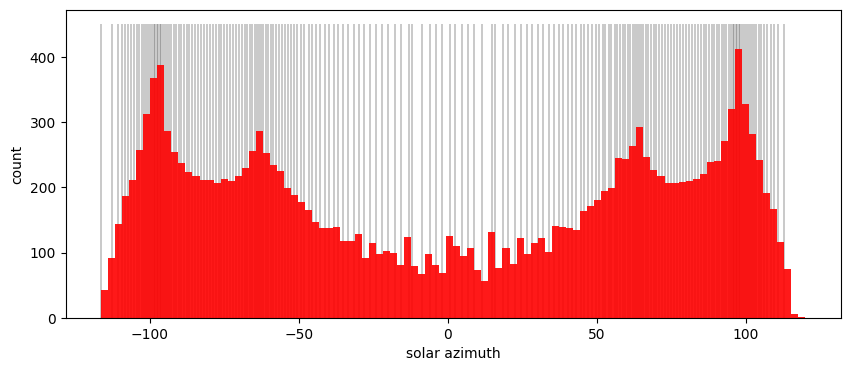

In [71]:
a = df.query('mg > 0 and azimuth > -120 and azimuth < 120')
l=4
plt.subplots(figsize=[l*2.5, l])


b = 200
plt.vlines(
    [a.azimuth.quantile(n/b) for n in range(b)],
    ymin=0, ymax=450, colors='black', zorder=0,linewidth=0.3
)
plt.hist(a.azimuth, bins=100, alpha=0.9, color='red')
plt.xlabel("solar azimuth")
plt.ylabel("count")


In [8]:
dict_params = {}
dataframes = {}
i = 0
for foldername, foldchildren, filechildren in os.walk('./results/v02'):
    if 'julia' in foldername:
        continue
    
    if len(filechildren) > 0:
        for file in filechildren:
            regex = "evaluation"
            # print(foldername)
            if re.search(regex, foldername):
                split = foldername.replace('n_steps','n-steps').replace('\\','/').split('/')
                filename = os.path.join(foldername, file) 

                model = split[3]
                params = split[5].split('_')

                r ={'model':model}
                for p in params:
                    x = p.split('=')
                    r[x[0]] = float(x[1])

                if dict_params.get(foldername) is None:
                    dict_params[foldername] = r
                    dataframes[foldername] = []

                dataframes[foldername].append(pd.read_csv(filename, parse_dates=[0], index_col=0))

                print(model, params, filename)

REINFORCE ['learning-rate=0.7', 'decay-rate=0.9', 'tuple-size=160'] ./results/v02/REINFORCE/evaluation/learning-rate=0.7_decay-rate=0.9_tuple-size=160/checkpoint_7.csv
REINFORCE ['learning-rate=0.7', 'decay-rate=0.9', 'tuple-size=160'] ./results/v02/REINFORCE/evaluation/learning-rate=0.7_decay-rate=0.9_tuple-size=160/checkpoint_6.csv
REINFORCE ['learning-rate=0.7', 'decay-rate=0.9', 'tuple-size=160'] ./results/v02/REINFORCE/evaluation/learning-rate=0.7_decay-rate=0.9_tuple-size=160/checkpoint_4.csv
REINFORCE ['learning-rate=0.7', 'decay-rate=0.9', 'tuple-size=160'] ./results/v02/REINFORCE/evaluation/learning-rate=0.7_decay-rate=0.9_tuple-size=160/checkpoint_5.csv
REINFORCE ['learning-rate=0.7', 'decay-rate=0.9', 'tuple-size=160'] ./results/v02/REINFORCE/evaluation/learning-rate=0.7_decay-rate=0.9_tuple-size=160/checkpoint_1.csv
REINFORCE ['learning-rate=0.7', 'decay-rate=0.9', 'tuple-size=160'] ./results/v02/REINFORCE/evaluation/learning-rate=0.7_decay-rate=0.9_tuple-size=160/checkpoin

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [4]:
results = {}
model = 'SARSA'

dfr = []
examples_cs = {}
examples_br = {}

for folder in dict_params:
    print(folder)
    example_cs = pd.DataFrame()
    example_br = pd.DataFrame()
    ghi = 0
    ratio = 0

    sghi = 0
    sref = 0#,[]
    smodel = 0#,[]
    c=0
    for df in dataframes[folder]:
        if df.ghi.sum() > ghi:
            example_cs = df.copy()
            ghi = df.ghi.sum()

        if df.POA.sum()/df.mg.sum() > ratio:
            example_br = df.copy()
            ratio = df.POA.sum()/df.mg.sum() 

        sghi += df.ghi.sum()
        sref += df.mg.sum()# [df.mg.sum()/df.ghi.sum()]
        smodel += df.POA.sum()# [df.POA.sum()/df.ghi.sum()]
        c+=1

    examples_cs[folder] = example_cs
    examples_br[folder] = example_br
        
    r =  dict_params[folder]


    r['model_transp'] = smodel/sghi# np.median(smodel)
    r['ref_transp'] = sref/sghi# np.median(sref)
    r['days'] = c


    dfr.append(r)

./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.25_decay-rate=0.25_n-steps=4_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.5_n-steps=1_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.5_n-steps=2_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.5_n-steps=4_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.5_decay-rate=0.7_n-steps=8_tuple-size=20
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=16_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=1_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=2_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=4_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\learning-rate=0.7_decay-rate=0.5_n-steps=8_tuple-size=160
./results/v02\ACTOR_CRITIC\evaluation\

In [5]:
dffinal = pd.DataFrame.from_records(dfr).assign(ratio = lambda dfx: dfx.model_transp/dfx.ref_transp)
dffinal.query('days > 1').sort_values('ratio', ascending=False).head(10)

,model,learning-rate,decay-rate,n-steps,tuple-size,model_transp,ref_transp,days,epsilon,forget-factor,ratio
456,WQNN,0.90,0.25,NaN,160.0,1.099492,1.107895,25,0.98,0.25,0.992415
286,SARSA,0.25,0.25,4.0,160.0,1.091863,1.107895,25,0.90,NaN,0.985529
291,SARSA,0.70,0.50,4.0,40.0,1.087566,1.107895,25,0.90,NaN,0.981651
450,WQNN,0.70,0.25,NaN,40.0,1.086130,1.107895,25,0.98,0.98,0.980355
250,SARSA,0.25,0.25,4.0,80.0,1.085867,1.107895,25,0.98,NaN,0.980118
429,WQNN,0.25,0.25,NaN,40.0,1.084552,1.107895,25,0.70,0.25,0.978931
268,SARSA,0.70,0.90,4.0,80.0,1.081555,1.107895,25,0.98,NaN,0.976226
287,SARSA,0.25,0.50,2.0,80.0,1.081068,1.107895,25,0.90,NaN,0.975785
457,WQNN,0.90,0.70,NaN,160.0,1.080478,1.107895,25,0.98,0.25,0.975253
285,SARSA,0.25,0.25,1.0,80.0,1.080442,1.107895,25,0.90,NaN,0.975221


In [6]:
dffinal.query('days > 1').groupby('model').count()[['days']]

,days
model,
ACTOR_CRITIC,5
REINFORCE,21
SARSA,274
WQNN,160


In [7]:
dffinal.query('days > 1').groupby('model').max()[['ratio']]

,ratio
model,
ACTOR_CRITIC,0.918784
REINFORCE,0.906748
SARSA,0.985529
WQNN,0.992415


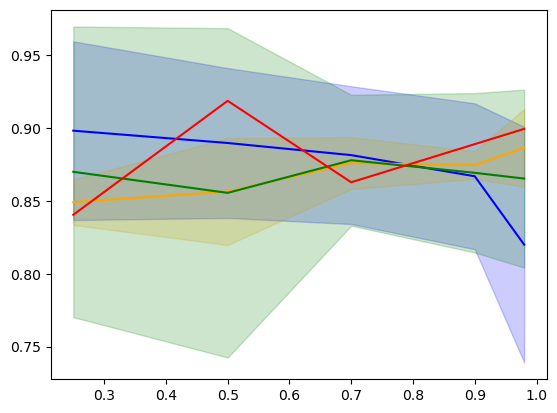

In [29]:
m = "SARSA"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='blue')
plt.plot(x.index, x[['ratio']], color='blue')

m = "REINFORCE"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='orange')
plt.plot(x.index, x[['ratio']], color='orange')

m = "WQNN"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='green')
plt.plot(x.index, x[['ratio']], color='green')

m = "ACTOR_CRITIC"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby('learning-rate')[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='red')
plt.plot(x.index, x[['ratio']], color='red')


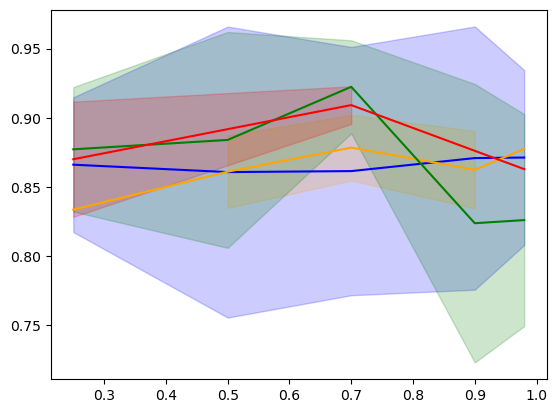

: 

In [30]:
param = 'decay-rate'

m = "SARSA"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='blue')
plt.plot(x.index, x[['ratio']], color='blue')

m = "REINFORCE"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='orange')
plt.plot(x.index, x[['ratio']], color='orange')

m = "WQNN"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='green')
plt.plot(x.index, x[['ratio']], color='green')

m = "ACTOR_CRITIC"
y = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].std()
x = dffinal.query(f'days > 1 and model == "{m}"').groupby(param)[['ratio']].mean()

plt.fill_between(y.index, (x['ratio'] + y['ratio']), (x['ratio'] - y['ratio']), alpha=0.2, color='red')
plt.plot(x.index, x[['ratio']], color='red')


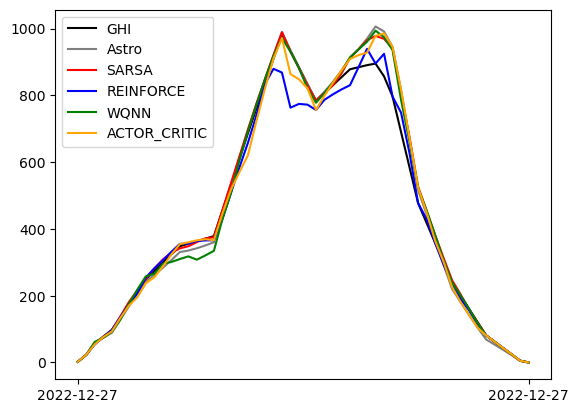

In [42]:
n = 25
a = dffinal.query('days > 1 and model == "SARSA"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/SARSA/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n_steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'SARSA', c='red')

a = dffinal.query('days > 1 and model == "REINFORCE"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/REINFORCE/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'REINFORCE', c='blue')

a = dffinal.query('days > 1 and model == "WQNN"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/WQNN/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_forget-factor={a["forget-factor"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'WQNN', c='green')

m = "ACTOR_CRITIC"
a = dffinal.query(f'days > 1 and model == "{m}"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/{m}/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n-steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = m, c='orange')

plt.xticks([df.index.min(), df.index.max()])
plt.legend()

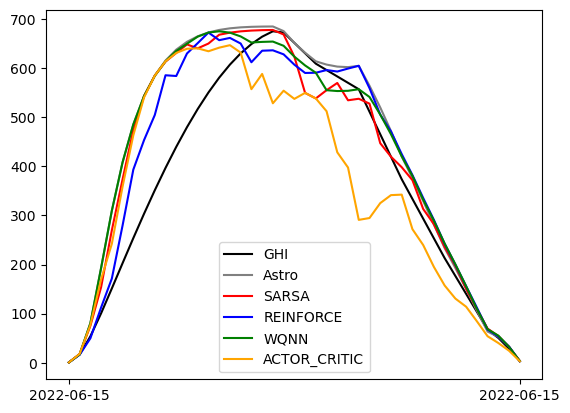

In [43]:
n=12
a = dffinal.query('days > 1 and model == "SARSA"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/SARSA/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n_steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'SARSA', c='red')

a = dffinal.query('days > 1 and model == "REINFORCE"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/REINFORCE/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'REINFORCE', c='blue')

a = dffinal.query('days > 1 and model == "WQNN"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/WQNN/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_forget-factor={a["forget-factor"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'WQNN', c='green')

m = "ACTOR_CRITIC"
a = dffinal.query(f'days > 1 and model == "{m}"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/{m}/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n-steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = m, c='orange')

plt.xticks([df.index.min(), df.index.max()])
plt.legend()

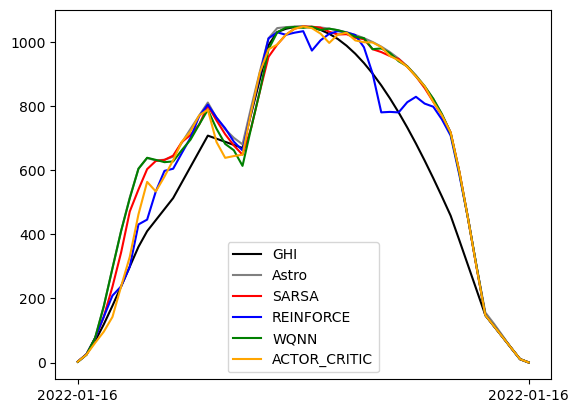

In [44]:
n=2
a = dffinal.query('days > 1 and model == "SARSA"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/SARSA/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n_steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.ghi, label = 'GHI', c='black')
plt.plot(df.index, df.mg, label = 'Astro', c='grey')
plt.plot(df.index, df.POA, label = 'SARSA', c='red')

a = dffinal.query('days > 1 and model == "REINFORCE"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/REINFORCE/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'REINFORCE', c='blue')


a = dffinal.query('days > 1 and model == "WQNN"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/WQNN/evaluation/epsilon={a["epsilon"]}_learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_forget-factor={a["forget-factor"]}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = 'WQNN', c='green')

m = "ACTOR_CRITIC"
a = dffinal.query(f'days > 1 and model == "{m}"').sort_values('ratio', ascending=False).reset_index().iloc[0]
df = pd.read_csv(f'results/v02/{m}/evaluation/learning-rate={a["learning-rate"]}_decay-rate={a["decay-rate"]}_n-steps={int(a["n-steps"])}_tuple-size={int(a["tuple-size"])}/checkpoint_{n}.csv', parse_dates=['ts'], index_col='ts')
df = df.query('mg > 0')
plt.plot(df.index, df.POA, label = m, c='orange')

plt.xticks([df.index.min(), df.index.max()])
plt.legend()